# 4.9: Intro to Data Visualization with Python

## The Script contains the following points:
1. Importing Libraries
2. Importing Dataframes
3. Creating a Bar Chart
4. Creating a Histogram of the "prices" column
5. Creating a Scatterplot
6. Creating a Line Chart
7. Sampling Data

# Part 2 - Task 4.9 DAT

## The Script contains the following points:
8. Importing the customers_ords_prods_merge dataframe
9. Creating a histogram of the “order_hour_of_day” column
10. Creating a Bar Chart from the "loyalty_flag" column
11. Sampling data for "prices" column
12. Creating the line chart 2 
13. Determing relationship between age and family
14. Connection between age and spending power (income)

## Importing Data and Libraries 

In [2]:
# Import libraries 

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataframe

In [3]:
path = r'/Users/datcaodo/Documents/22-03-2024 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_grouped.pkl'))

## Creating a Bar Chart

<Axes: xlabel='orders_day_of_week'>

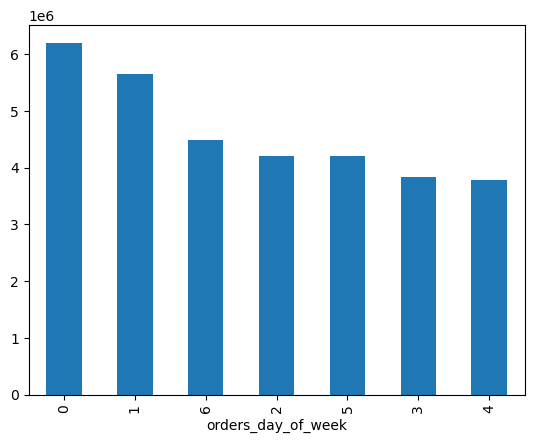

In [4]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

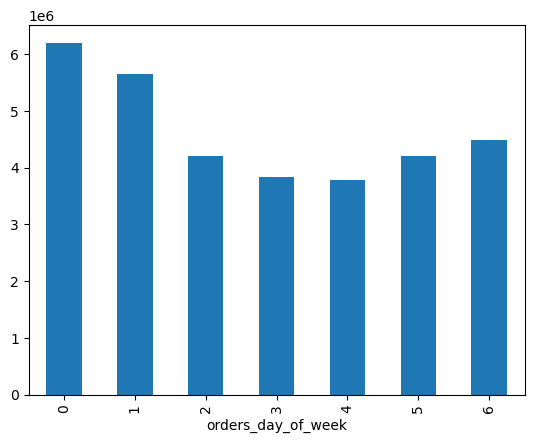

In [5]:
# sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# The same applies to printing frequencies

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

### To make your bars more distinct, you can also change their color. Doing so is as easy as adding a color argument in your plot.bar() function and listing the colors you want in order:

<Axes: xlabel='orders_day_of_week'>

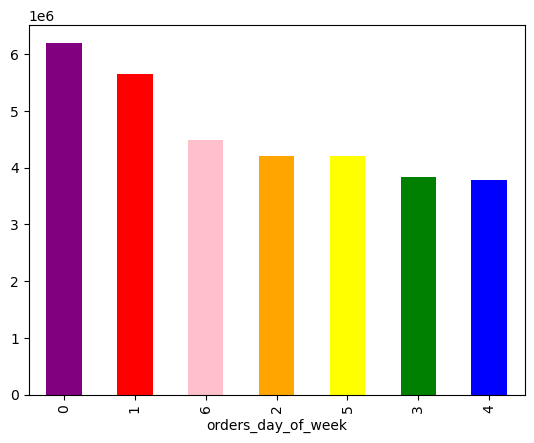

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

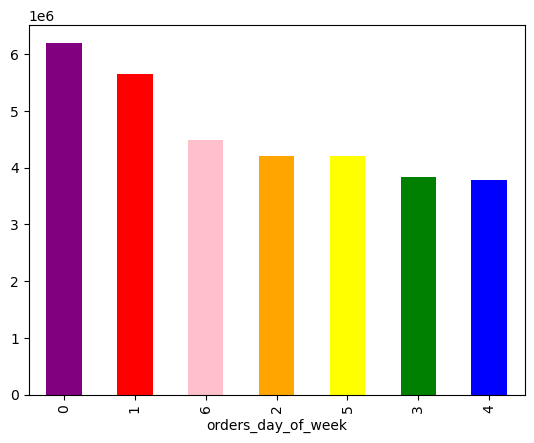

In [8]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

Now the bar chart is saved through the assigning 

The next step is to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function:

### Exporting the chart

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


## Creating a histogram of the 'prices' column

<Axes: ylabel='Frequency'>

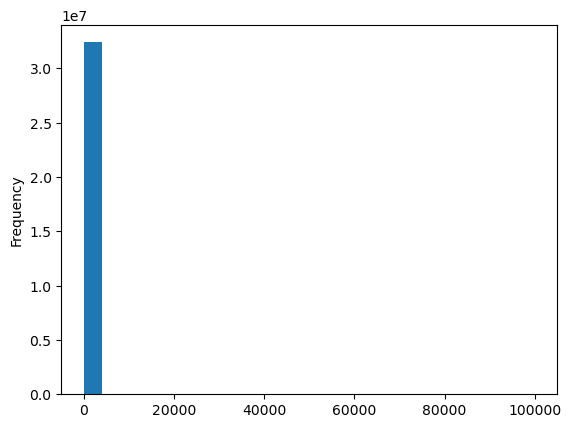

In [10]:
ords_prods_merge['prices'].plot.hist(bins = 25)

#  A smaller number of bins equates to denser bars, while a larger number of bins equates to sparser bars.

In [11]:
ords_prods_merge['prices'].describe()

# Remember that the describe() function gives you a quick list of descriptive statistics for a column.

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### Further investigation 

In [12]:
ords_prods_merge['prices'].max()

99999.0

In [13]:
ords_prods_merge['prices'].min()

1.0

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].mean()

11.980225638383468

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00?

## Creating a Scatterplot

Normally, you’d use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers.

<Axes: xlabel='prices', ylabel='prices'>

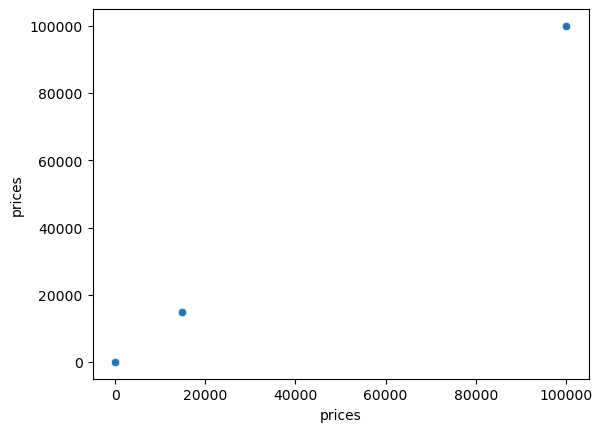

In [16]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item.

In [17]:
# Items above 100 dollars

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular Customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High Spender,12.0,Regular Customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent Customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,High-range product,Regularly busy,Slowest busy,Most orders,15,Regular customer,451.153540,High Spender,5.0,Frequent Customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,High-range product,Regularly busy,Slowest busy,Average orders,12,Regular customer,1178.381871,High Spender,12.0,Regular Customer


For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, use the following code:

In [18]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [19]:
ords_prods_merge['prices'].max()

25.0

Perfect. Logically, you know that a 25 grocery item is much more likely than a 14,900 item (and especially a 99,999 item!)

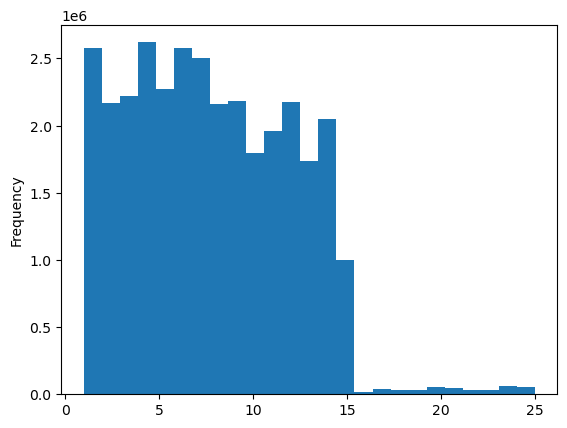

In [20]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

Your results make much more sense now: most products are between 1 and 15, while a few are higher priced at 15 to 25.

To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. This will result in a histogram with more, thinner columns:

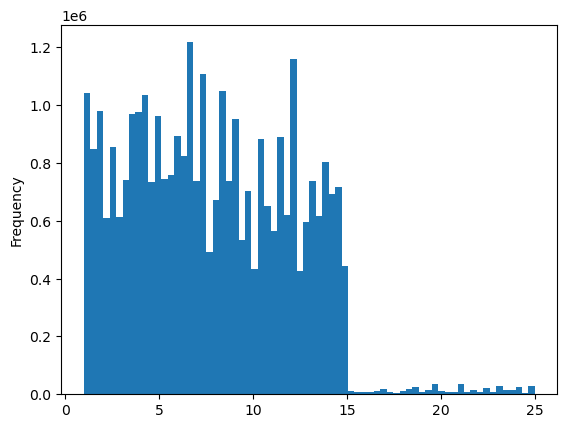

In [21]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

### Exporting the Histogram

In [22]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))


### Creating Line Chart

Line charts are traditionally used to visualize the development of a characteristic over time.

There is, however, one major caveat: this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error and/or have your browser crash (if you have a machine with less than 16GB RAM maybe keep in mind that attempting this will cost you time to reset and start over). To avoid this, you can use the subsetting method you should be familiar with by now. For example, you might consider only plotting the top or bottom 2,000,000 rows of your dataframe:

df = ords_prods_merge[:2000000]

But does this work? The answer is, well, no. That’s because this subset wouldn’t be representative of the entire population. How, then, do you tackle a problem like this? The answer is simple—sampling!

## Sampling Data

In order to create a subset that actually represents the entirety of your data, you’d need more than just the first 2,000,000 rows. And, more importantly, those rows would need to be randomized.

This is a standard approach in machine learning. When training a model, you’d normally use 80 percent of a data set to train the algorithm and the remaining 20 percent to check the accuracy of the model.

In [23]:
np.random.seed(4)

# Creating a new list holding True/False values to test the np.random.rant() <=0.7 called:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

#  np.random.rand() function being used as your argument. 
#  This function is what will actually create your list of random floating numbers between 0 and 1.
# The np at the beginning stands for the NumPy library, the random in the middle is a function that creates random numbers, 
# and the rand at the end is a function that ensures the random numbers generated by random follow the uniform distribution.
# This len() produces a value that represents the length of whatever you put inside it.

The value you put inside the seed doesn’t actually matter in the grand scheme of things. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible. 

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
np.random.rand(10)

# As you can see, the np.random.rand() function produces a list of random numbers between 0 and 1. 
# Here, the argument is 10, so 10 random numbers are produced. 

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

For every value in the list that’s True, the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample

In [26]:
# Store 70% of the sample in the daraframe big

big = ords_prods_merge[dev]

In [27]:
# Store 30% of the sample in the dataframe small 

small = ords_prods_merge[~dev]

Well, if big is 70 percent of ords_prds_merge and small is 30 percent of ords_prods_merge then, theoretically, if you added the rows of both samples together, you’d get the same numbers of rows as your original ords_prods_merge dataframe. Let’s give it a try using the len() function again:

In [28]:
len(ords_prods_merge)

32404859

In [29]:
len(big)+len(small)

32404859

Since the numbers match, you can assume that your subsetting procedure was at least successful in the technical sense.

As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” You can achieve this by running (and checking the result!) of the following command:

In [30]:
df_2 = small[['orders_day_of_week','prices']]

This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.

## Creating the line chart

In [32]:
# Convert infinite values to NaN
ords_prods_merge.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


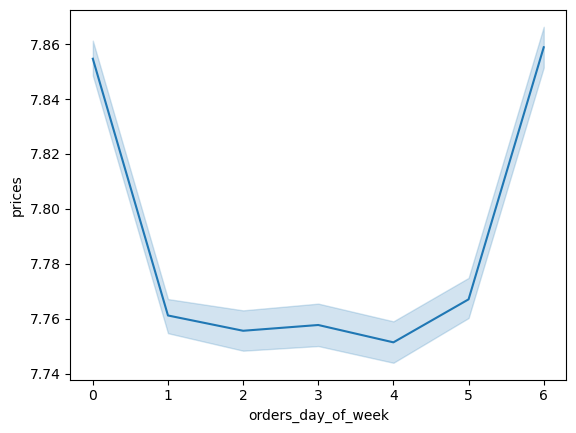

In [33]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## Exporting the Line Chart

In [34]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_dow.png'))


# Part 2 - Task 4.9 DAT

## Importing the customers_ords_prods_merge dataframe

In [4]:
customers_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods_merge.pkl'))

In [36]:
# Cheking the output

customers_ords_prods_merge.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Slowest busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer


In [37]:
customers_ords_prods_merge.shape

(32404859, 34)

## Creating a Histogram of the “order_hour_of_day” column.

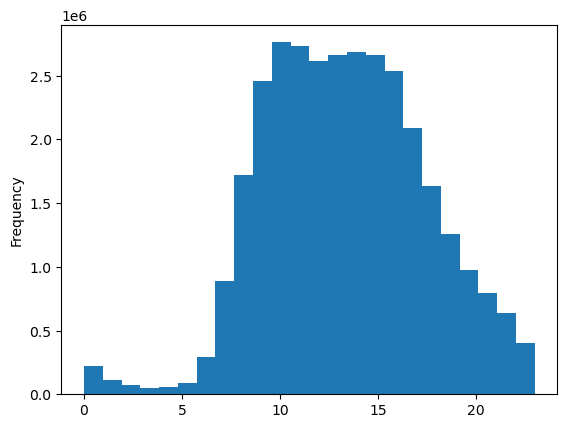

In [40]:
hist_2 = customers_ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

The histogram demonstrate that most of the sales are happening during the day time because at night most of the people are either sleeping or not ordering. We can see the frequency of the orders higher from 6 until 23 which means that people are ordering more during the day. Most people order at noon time between the hours 10-15.

In [41]:
#Exporting the histogram of the "order_hour_of_day"

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

## Creating a Bar Chart from the "loyalty_flag" column

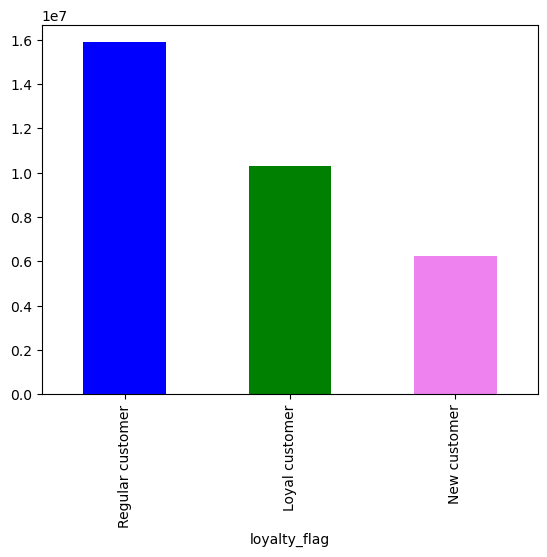

In [42]:
#creating a bar chart with color

bar_loyalty_flag = customers_ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color = ['blue','green', 'violet'])

### Exporting the bar chart 

In [43]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))


## Sampling data for "prices" column

In [5]:
np.random.seed(4)

# Creating a new list holding True/False values to test the np.random.rant() <=0.7 called:
dev_2 = np.random.rand(len(customers_ords_prods_merge)) <= 0.7

For every value in the list that’s True, the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample.

In [6]:
# Store 70% of the sample in the daraframe big

big_df = customers_ords_prods_merge[dev_2]

In [7]:
# Store 30% of the sample in the daraframe small

small_df = customers_ords_prods_merge[dev_2]

In [17]:
# This creates a new dataframe, small_dataframe, that contains only the “prices” and “order_hour_of_day” columns from your small subset.

small_dataframe = small_df[['order_hour_of_day','prices']]

In [9]:
# Convert infinite values to NaN
customers_ords_prods_merge.replace([np.inf, -np.inf], np.nan, inplace=True)

## Creating the line chart 2 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


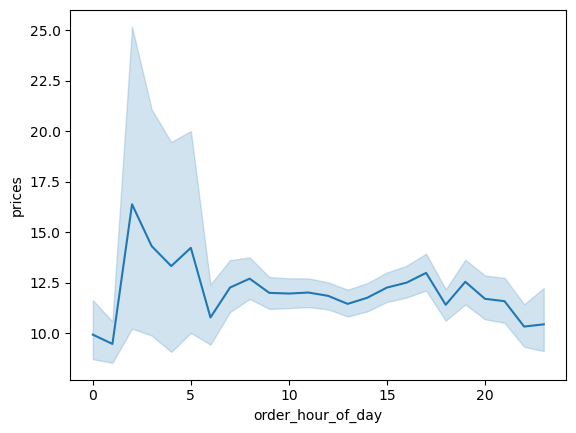

In [18]:
line_2 = sns.lineplot(data = small_dataframe, x = 'order_hour_of_day',y = 'prices')

We can see that the expenditure is the highest between the hours of 1-5.

### Exporting the Line Chart 2

In [11]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_and_hour.png'))


## Determing relationship between age and family

In [21]:
# This creates a new dataframe, small_age_famsit, that contains only the “Age” and “number_dependants” columns from your small subset.

small_age_famsit = small_df[['Age','number_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


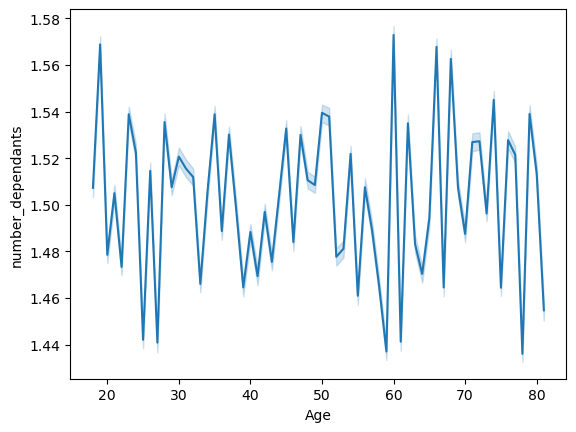

In [22]:
line_age_famsit = sns.lineplot(data = small_age_famsit, x = 'Age',y = 'number_dependants')

The Line Chart shows a up and down which is very volatile and inconsistent. In other words it is like a zig zag which indicates that there isn't a correlation between the two data.

### Exporting the Line Chart 3

In [23]:
line_age_famsit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_famsit.png'))


## Connection between age and spending power (income)

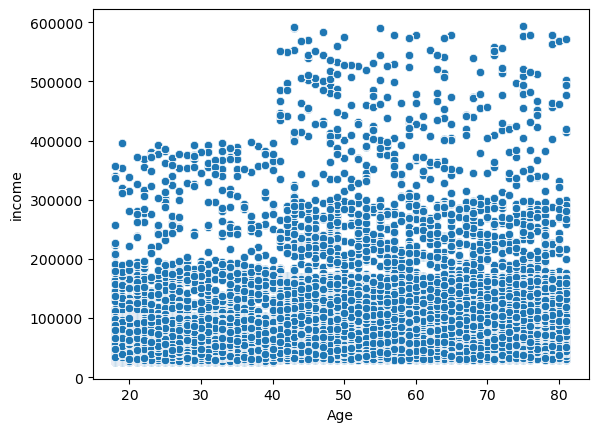

In [26]:
# Creating a scatterplot to visualize the relationship between age and spending power (income)

scatterplot = sns.scatterplot(x = 'Age', y = 'income',data = customers_ords_prods_merge)

The scatterplot chart shows that the income or spending power of the people above 40 years of age is higher than the once below 40 years of age. This means that the people above 40 are earning more or are having a bigger income than the people below 40.

### Exporting the Scatterplot

In [27]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))
